In [1]:
import numpy as np 
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
files = glob.glob('./soft_attention/run*.csv')
files.sort()
files

['./soft_attention/run-soft_attention-tag-Loss_train.csv',
 './soft_attention/run-soft_attention_resnet-tag-Loss_train.csv',
 './soft_attention/run-soft_attention_resnet_nogate-tag-Loss_train.csv']

In [3]:
names = ["mobile_net encoder",
         "resnet encoder", 
         "resnet encoder (no gate)"]

In [4]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

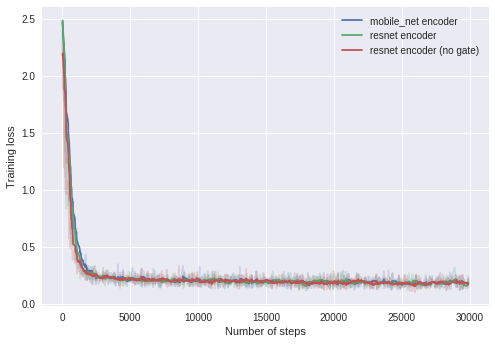

<Figure size 576x396 with 0 Axes>

In [8]:
plt.style.use('seaborn-notebook')
plt.style.use('seaborn')

def plot_training(data_files,names,smooth_weight=0.85,ylim=None):
    losses = []
    losses_smoothed = []
    xs = []
    for data_file in data_files:
        df = pd.read_csv(data_file)
        loss = np.array(df['Value'])
        losses.append(loss)

        loss_smoothed = smooth(loss, smooth_weight)

        losses_smoothed.append(loss_smoothed)
        xs.append(np.array(df['Step']))

    plt.figure()

    for (x,loss,loss_smoothed,name) in zip(xs,losses,losses_smoothed,names):
        p = plt.plot(x,loss,alpha=0.2)
        plt.plot(x,loss_smoothed,label=name,c=p[0].get_color())
    plt.legend()
    if ylim:
        plt.ylim(ylim)
    # plt.title("Loss vs Steps")
    plt.xlabel("Number of steps")
    plt.ylabel("Training loss")
    # plt.savefig('./figures/loss.png',dpi=300,bbox_inches='tight')
    plt.figure()

plot_training(files,names)

## BLEU score

In [13]:
prediction_dir = '../saved_predictions/soft_attention/'

In [25]:
pred_files = glob.glob(prediction_dir + '*_pred.pkl')
pred_files.sort()
label_files = glob.glob(prediction_dir + '*_label.pkl')
label_files.sort()
names = ['mobilenet','resnet','resnet_no_gate']
pred_files,label_files,names

(['../saved_predictions/soft_attention/soft_attention14_pred.pkl',
  '../saved_predictions/soft_attention/soft_attention_resnet14_pred.pkl',
  '../saved_predictions/soft_attention/soft_attention_resnet_nogate14_pred.pkl'],
 ['../saved_predictions/soft_attention/soft_attention14_label.pkl',
  '../saved_predictions/soft_attention/soft_attention_resnet14_label.pkl',
  '../saved_predictions/soft_attention/soft_attention_resnet_nogate14_label.pkl'],
 ['mobilenet', 'resnet', 'resnet_no_gate'])

In [27]:
import pickle
total_preds = {}
total_labels = {}
for n,a,b in zip(names,pred_files,label_files):
    with open(a,'rb') as f:
        total_preds[n] = pickle.load(f)
    with open(b,'rb') as f:
        total_labels[n] = pickle.load(f)   

In [29]:
total_labels['resnet'][0]

['SOS', 'obstacles', 'on', 'the', 'rightlane', 'EOS']

In [30]:
total_preds['resnet'][0]

['obstacles',
 'on',
 'the',
 'leftlane',
 ';',
 'obstacles',
 'on',
 'the',
 'rightlane',
 'EOS']

In [35]:
from nltk.translate.bleu_score import sentence_bleu

In [39]:
sentence_bleu(total_labels['resnet'][0],total_preds['resnet'][0])

0

In [ ]:
from nltk.translate.bleu_score import sentence_bleu